In [55]:
# Using dataset from library
from sklearn import datasets
diabetes_ds = datasets.load_diabetes()

In [56]:
# output data/values
diabetes_ds.data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [57]:
# progress of the disease
diabetes_ds.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [58]:
# convert the imported diabetes dataset into a panda dataframe
import pandas as pd
df = pd.DataFrame(diabetes_ds.data, columns=diabetes_ds.feature_names)
df['target'] = pd.Series(diabetes_ds.target)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [104]:
# variables to hold the input (X) and the output (y)
X = df['age'].values.reshape((-1,1))
y = df['target']

In [105]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np

lnreg = linear_model.LinearRegression()

# split the dataframe into 20% for test and 80% as train set 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print('X-Train -shape of input features for training', x_train.shape)
print('X-Test -shape of input features for training', x_test.shape)

X-Train -shape of input features for training (353, 1)
X-Test -shape of input features for training (89, 1)


In [106]:
lnreg.fit(x_train,y_train)


from sklearn import metrics

print('Co-efficient of linear regression',lnreg.coef_)
print('Intercept of linear regression model',lnreg.intercept_)

Co-efficient of linear regression [331.072172]
Intercept of linear regression model 153.2592015331949


In [107]:
predictions = lnreg.predict(x_test)
print('Mean Square Error', metrics.mean_squared_error(y_test, predictions))
print('Model R^2 Square value', metrics.r2_score(y_test, predictions))

Mean Square Error 5254.231976236004
Model R^2 Square value 0.008289640305771506


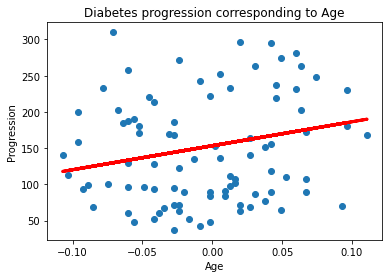

In [108]:
# Plot a graph
import  matplotlib.pyplot as plt
plt.scatter(x_test, y_test)
plt.plot(x_test, predictions, color='red', linewidth=3)
plt.xlabel('Age')
plt.ylabel('Progression')
plt.title('Diabetes progression corresponding to Age')
plt.show()